## Step 1: Import all necessary packages and libraries

In [32]:
## Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Cleaning and Preprocessing

In [2]:
## Read the dataset
df = pd.read_csv('Leads.csv')

In [3]:
## First few entries in the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
## Check shape of the dataset
df.shape

(9240, 37)

In [5]:
## Check the info to see the types of feature variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
## Drop ID columns
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [7]:
## Treat 'Select' as missing
df.replace('Select', np.nan, inplace=True)

In [8]:
## Let's now check the percentage of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [9]:
## Drop columns with > 35% missing values
missing_percent = df.isnull().sum() / len(df)
cols_to_drop = missing_percent[missing_percent > 0.35].index
df.drop(columns=cols_to_drop, inplace=True)

In [10]:
## Let's now check the percentage of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [11]:
## Drop rows with missing values in key columns
df.dropna(inplace=True)

In [12]:
## Let's now check the percentage of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [13]:
## Drop 'City' and 'Country' Columns as they won't be used in analysis
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque','Country','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [17]:
## Convert categorical variables to dummies
df = pd.get_dummies(df, drop_first=True)

In [18]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,5.0,674,2.5,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
6,1,2.0,1640,2.0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [21]:
## Percantage of rows retained after data cleaning
print(len(df.index))
print((len(df.index)/9240)*100)

4925
53.30086580086581


## Step 3: Split and scale the Data

In [22]:
## Split and train the data
X = df.drop('Converted', axis=1)
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Feature Selection using RFE

In [23]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

selected_features = X_train.columns[rfe.support_]
selected_features

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Step 5: Train Final Model

In [24]:
logreg_final = LogisticRegression(max_iter=1000)
logreg_final.fit(X_train[selected_features], y_train)

# Coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logreg_final.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)

,Feature,Coefficient
10,What is your current occupation_Working Profes...,2.637134
2,Lead Origin_Lead Add Form,1.496496
12,Last Notable Activity_Had a Phone Conversation,1.406541
14,Last Notable Activity_Unreachable,1.159456
11,Last Notable Activity_Email Bounced,0.820740
13,Last Notable Activity_SMS Sent,0.801761
8,What is your current occupation_Housewife,0.516390
7,Last Activity_SMS Sent,0.362249
0,TotalVisits,0.045582
1,Total Time Spent on Website,0.001947


## Step 6: Evaluate Lead Scores

In [25]:
# Fit the model first
logreg.fit(X_train_scaled, y_train)

# Now predict probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Create Lead Score (0 to 100 scale)
lead_scores = (y_pred_proba * 100).round(2)
lead_scores

array([82.35, 83.54,  0.98, ...,  7.96, 17.72, 53.63])

In [26]:
# Create a DataFrame with lead scores and actual values
X_test_copy = X_test.copy()
X_test_copy["Lead Score"] = lead_scores
X_test_copy["Converted"] = y_test.values

# Extract hot leads
hot_leads = X_test_copy[X_test_copy["Lead Score"] >= 70]
print("🔥 Hot Leads (Lead Score ≥ 70):")
print(hot_leads)

hot_leads.to_csv("hot_leads.csv", index=False)

🔥 Hot Leads (Lead Score ≥ 70):
      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2259          5.0                         1204                   5.0   
4531          8.0                         1036                   4.0   
4878          2.0                          916                   2.0   
1488          1.0                          993                   1.0   
3921          5.0                         1320                   5.0   
...           ...                          ...                   ...   
7240         10.0                         1324                   2.0   
2578          3.0                          597                   3.0   
4851          2.0                         1310                   1.0   
5266          3.0                         1759                   3.0   
7472          2.0                         1386                   2.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2259                            

## Step 7: Evaluate Metrics and Confusion Matrix

In [34]:
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Optional: Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[694 130]
 [197 457]]

Accuracy: 0.7788
Precision: 0.7785
Recall: 0.6988

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       824
           1       0.78      0.70      0.74       654

    accuracy                           0.78      1478
   macro avg       0.78      0.77      0.77      1478
weighted avg       0.78      0.78      0.78      1478



## Step 8: Evaluate & Get ROC AUC Score

In [35]:
y_pred_prob = logreg_final.predict_proba(X_test[selected_features])[:,1]
roc_auc=roc_auc_score(y_test, y_pred_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.8582


## Step 9: Plot ROC Curve

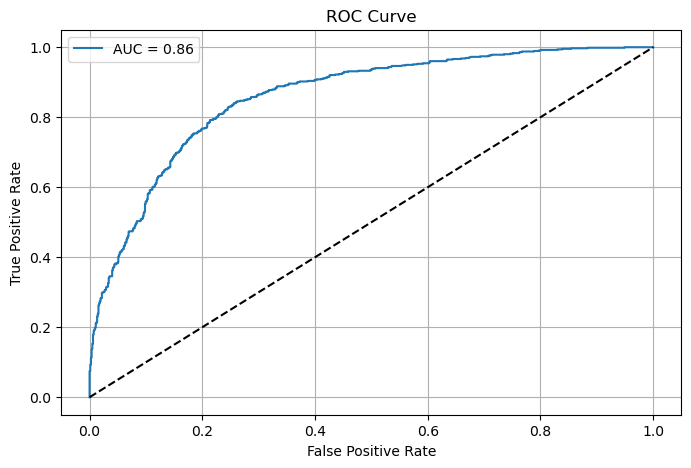

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()